In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import DBSCAN
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

In [3]:
pd.set_option('display.max_rows', 30)

In [4]:
data = pd.read_csv("currentData.csv")
data.dropna(axis=1)
df = pd.DataFrame(data)
df

C:\Users\iphon\AppData\Local\Temp\ipykernel_21524\3987983659.py:1: DtypeWarning: Columns (20,56) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("currentData.csv")


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,1069639,1304742,7000.0,7000.0,7000.0,60 months,15.96,170.08,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,32,1065420,1299514,10000.0,10000.0,9975.0,60 months,15.96,242.97,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,39,1069346,1304237,12500.0,12500.0,12475.0,60 months,12.69,282.44,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,61,1068934,1277395,17500.0,8950.0,8925.0,60 months,17.27,223.74,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601774,887374,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,...,NaN,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN
601775,887375,36441262,39152692,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,...,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN
601776,887376,36271333,38982739,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,...,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN
601777,887377,36490806,39222577,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,...,NaN,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN


In [5]:
droppped = df.dropna(axis=1)
droppped

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,next_pymnt_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq
0,4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,...,1009.07,0.0,0.0,0.0,67.79,Feb-2016,0.0,1.0,INDIVIDUAL,0.0
1,6,1069639,1304742,7000.0,7000.0,7000.0,60 months,15.96,170.08,C,...,3025.99,0.0,0.0,0.0,170.08,Feb-2016,0.0,1.0,INDIVIDUAL,0.0
2,32,1065420,1299514,10000.0,10000.0,9975.0,60 months,15.96,242.97,C,...,4317.69,0.0,0.0,0.0,242.97,Jan-2016,0.0,1.0,INDIVIDUAL,0.0
3,39,1069346,1304237,12500.0,12500.0,12475.0,60 months,12.69,282.44,B,...,4199.67,0.0,0.0,0.0,282.44,Jan-2016,0.0,1.0,INDIVIDUAL,0.0
4,61,1068934,1277395,17500.0,8950.0,8925.0,60 months,17.27,223.74,D,...,4225.77,0.0,0.0,0.0,223.74,Jan-2016,0.0,1.0,INDIVIDUAL,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601774,887374,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,...,1027.35,0.0,0.0,0.0,332.10,Feb-2016,0.0,1.0,INDIVIDUAL,0.0
601775,887375,36441262,39152692,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,...,2465.65,0.0,0.0,0.0,797.03,Feb-2016,0.0,1.0,INDIVIDUAL,0.0
601776,887376,36271333,38982739,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,...,1925.24,0.0,0.0,0.0,316.07,Feb-2016,0.0,1.0,INDIVIDUAL,0.0
601777,887377,36490806,39222577,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,...,2234.98,0.0,0.0,0.0,317.86,Feb-2016,1.0,1.0,INDIVIDUAL,0.0


In [6]:
MoreDropped = droppped.drop(["Unnamed: 0", "id", "member_id", "acc_now_delinq", "total_rec_late_fee", "recoveries", "next_pymnt_d", "collections_12_mths_ex_med", "policy_code"], axis=1)
MoreDropped
sns.set_palette("colorblind")

In [7]:
MoreDropped["initial_list_status"].value_counts()
MoreDropped.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'collection_recovery_fee', 'last_pymnt_amnt',
       'application_type'],
      dtype='object')

In [8]:
MoreDropped["addr_state"].value_counts()
MoreDropped["annual_inc"].max()

bins = [0 , 30000, 60000, 90000, 120000, 150000, 180000, 210000]

labels = ["0-30k", "30-60k", "60-90k", "90-120k", "120-150k", "150-180k", "180-210k", "210k+"]

MoreDropped["Income Range"] = pd.qcut(MoreDropped["annual_inc"], q=8, labels=labels)


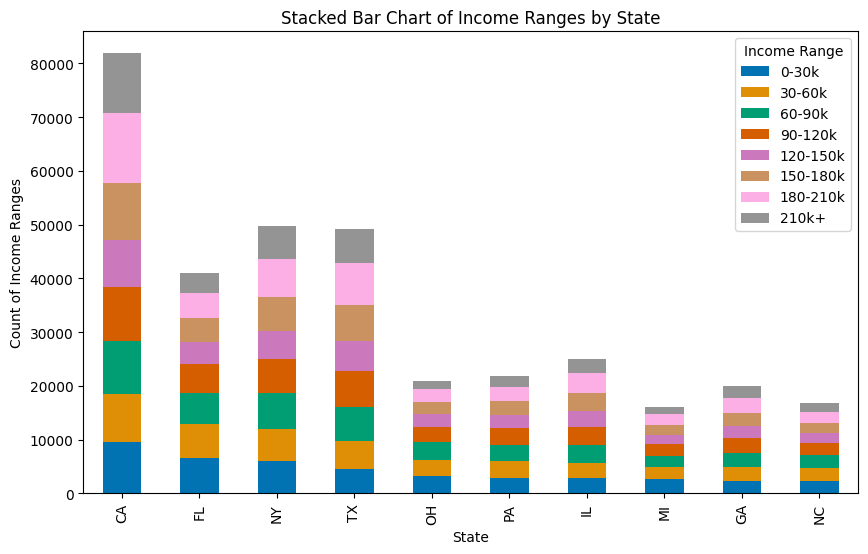

In [9]:
income_state_ct = pd.crosstab(MoreDropped['addr_state'], MoreDropped['Income Range'])

sorted_income = income_state_ct.sort_values(by=['0-30k', '30-60k', '60-90k', '90-120k', '120-150k',
                  '150-180k', '180-210k', '210k+'], ascending=False).head(10)

# Plot a stacked bar chart
sorted_income.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Chart of Income Ranges by State')
plt.xlabel('State')
plt.ylabel('Count of Income Ranges')
plt.show()

In [10]:
incomeState = pd.crosstab(MoreDropped["Income Range"], MoreDropped["addr_state"])

print(incomeState)

addr_state     AK    AL   AR    AZ     CA    CO    CT   DC   DE    FL  ...  \
Income Range                                                           ...   
0-30k         113  1060  808  1903   9521  1475   911   64  198  6625  ...   
30-60k        147  1004  728  1888   9066  1672   983  123  197  6349  ...   
60-90k        179  1184  690  1889   9812  1638  1117  147  242  5739  ...   
90-120k       213  1108  655  1785  10097  1658  1245  182  247  5318  ...   
120-150k      183   846  470  1385   8710  1412  1082  209  177  4218  ...   
150-180k      231   869  482  1620  10603  1594  1290  234  235  4380  ...   
180-210k      248   915  467  1756  12885  1819  1386  340  247  4603  ...   
210k+         155   590  337  1351  11157  1305  1339  244  187  3767  ...   

addr_state     SD    TN    TX   UT    VA   VT    WA    WI   WV   WY  
Income Range                                                         
0-30k         210  1585  4519  551  1638  194  1561  1216  516  140  
30-60k   

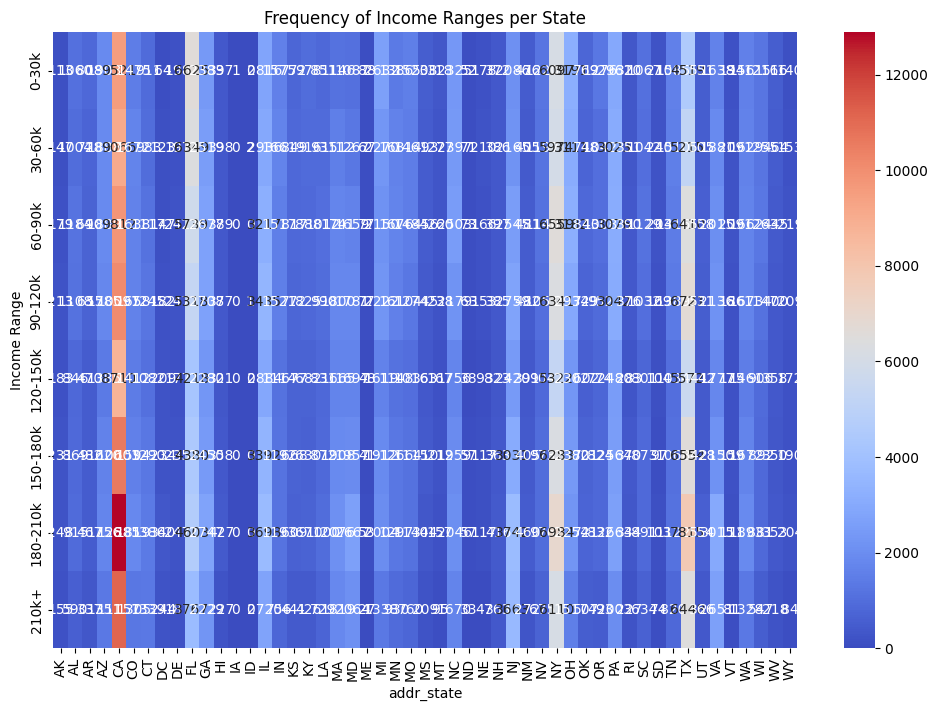

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(incomeState, annot=True, cmap='coolwarm', fmt='d')
plt.title('Frequency of Income Ranges per State')
plt.show()

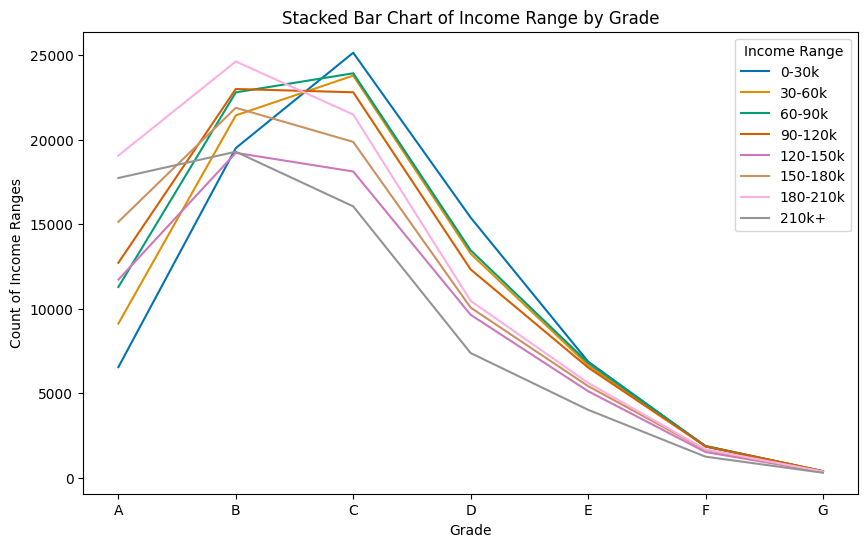

In [21]:
gradeToIncome = pd.crosstab(MoreDropped["grade"], MoreDropped['Income Range'])

gradeToIncome.plot(kind='line', figsize=(10, 6))
plt.title('Line Chart of Income Range by Grade')
plt.xlabel('Grade')
plt.ylabel('Count of Income Ranges')
plt.show()

C:\Users\iphon\AppData\Local\Temp\ipykernel_21524\1391331719.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=TopTen.values, y=TopTen.index,palette="Paired")


Teacher, debt_consolidation             6716
Manager, debt_consolidation             5287
Teacher, credit_card                    2807
Registered Nurse, debt_consolidation    2766
RN, debt_consolidation                  2670
Name: count, dtype: int64

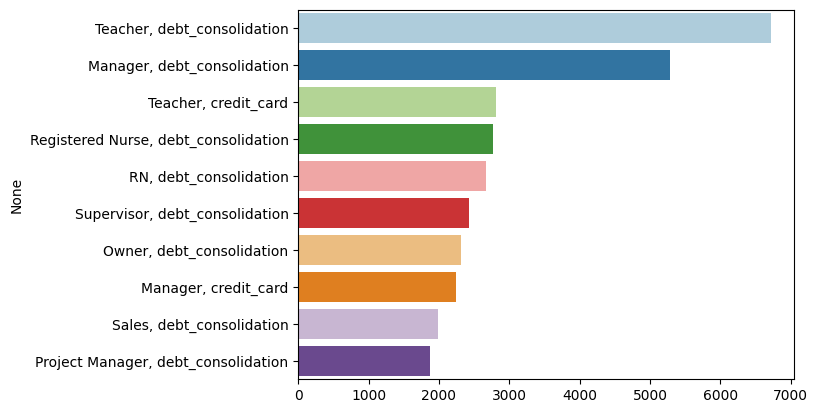

In [13]:
thisPeople = df[["emp_title", "purpose"]]
thisPeople

TopTen = thisPeople.value_counts().head(10)
TopTen.index = ["{0}, {1}".format(i[0], i[1]) for i in TopTen.index]


sns.barplot(x=TopTen.values, y=TopTen.index,palette="Paired")
TopTen.head()

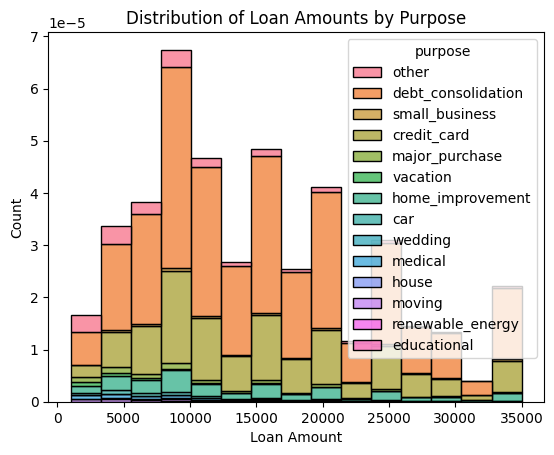

In [14]:
loanAmouts = data[["loan_amnt", "purpose"]]

sns.histplot(loanAmouts, x="loan_amnt", bins=15, hue="purpose", multiple="stack", stat='density')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Distribution of Loan Amounts by Purpose')
plt.show()


<Axes: xlabel='int_rate', ylabel='Density'>

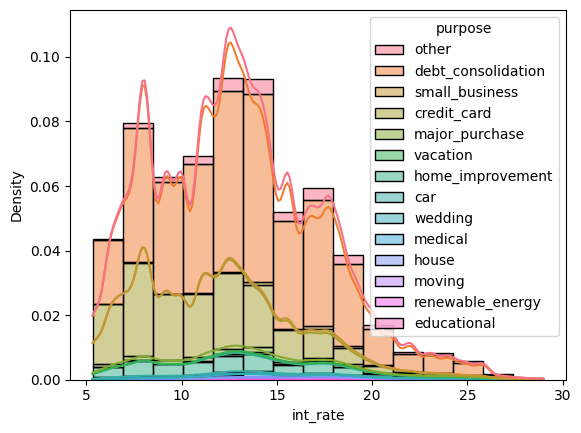

In [15]:
sns.histplot(data=data, x="int_rate", bins=15, hue="purpose", color= "tab10", multiple= "stack", stat="density", kde=True)

In [16]:
filled = droppped.fillna(method="ffill")

le = LabelEncoder() 

for i in filled.columns:
    if filled[i].dtype == "object":
        filled[i] = le.fit_transform(data[i])


C:\Users\iphon\AppData\Local\Temp\ipykernel_21524\4055908953.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filled = droppped.fillna(method="ffill")


In [17]:
imputer = SimpleImputer(strategy='mean')
filled_imputed = imputer.fit_transform(filled)

# Optional: Reduce dimensionality if there are more than 2 columns in 'filled'
if filled.shape[1] > 2:
    pca = PCA(n_components=2)
    filled_reduced = pca.fit_transform(filled_imputed)
else:
    filled_reduced = filled_imputed

# Step 2: Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=6)
clusters = dbscan.fit_predict(filled_reduced)


print(clusters)

[-1 -1 -1 ... -1 -1 -1]


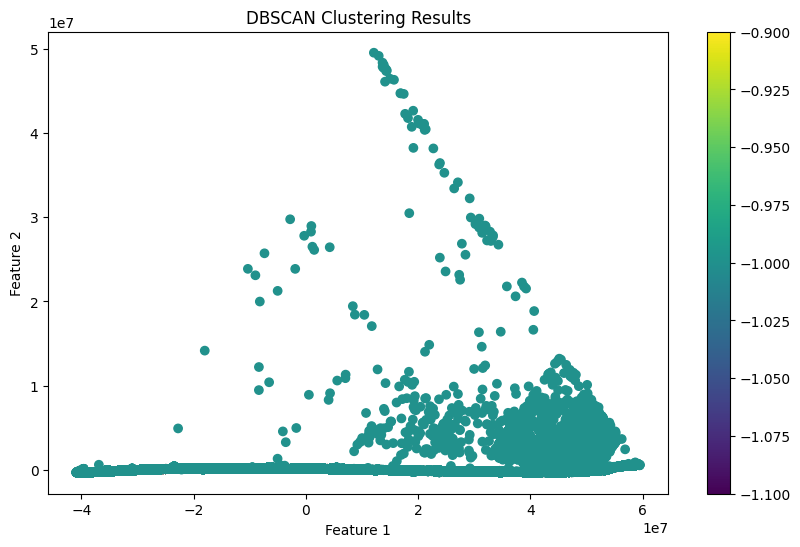

In [18]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(filled_reduced[:, 0], filled_reduced[:, 1], c=clusters, cmap='viridis', label=np.unique(clusters))
plt.title('DBSCAN Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(scatter)
plt.show()